In [225]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [226]:
ca = xr.open_dataset('Africa_cru_data.nc')
ca

<xarray.Dataset> Size: 378MB
Dimensions:  (lon: 150, lat: 146, time: 1440)
Coordinates:
  * lon      (lon) float32 600B -19.75 -19.25 -18.75 ... 53.75 54.25 54.75
  * lat      (lat) float32 584B -34.75 -34.25 -33.75 ... 36.75 37.25 37.75
  * time     (time) datetime64[ns] 12kB 1901-01-16 1901-02-15 ... 2020-12-16
Data variables:
    pre      (time, lat, lon) float32 126MB ...
    stn      (time, lat, lon) float64 252MB ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.05 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2103051243. Data generated from:pre.2103041709.dtb
    history:      Fri  5 Mar 14:41:58 GMT 2021 : User harry : Program makegri...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [227]:
clemz=ca.pre
clemz

<xarray.DataArray 'pre' (time: 1440, lat: 146, lon: 150)> Size: 126MB
[31536000 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 600B -19.75 -19.25 -18.75 ... 53.75 54.25 54.75
  * lat      (lat) float32 584B -34.75 -34.25 -33.75 ... 36.75 37.25 37.75
  * time     (time) datetime64[ns] 12kB 1901-01-16 1901-02-15 ... 2020-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [228]:
clemz_ght = clemz.sel(time=slice('2000-1','2010-12'),lon=slice(-3.5,1.5),lat=slice(4.5,11.5))
clemz_ght

<xarray.DataArray 'pre' (time: 132, lat: 14, lon: 10)> Size: 74kB
[18480 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 40B -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 56B 4.75 5.25 5.75 6.25 ... 9.75 10.25 10.75 11.25
  * time     (time) datetime64[ns] 1kB 2000-01-16 2000-02-15 ... 2010-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [229]:
clemz_t=clemz_ght.groupby('time.month').sum('time')
clemz_t

<xarray.DataArray 'pre' (month: 12, lat: 14, lon: 10)> Size: 7kB
array([[[0.00000000e+00, 2.99000000e+02, 3.09599976e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.75200012e+02, 2.73300018e+02, 2.59200012e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.17300018e+02, 2.14399994e+02, 2.10100006e+02, ...,
         1.67599991e+02, 2.82399994e+02, 0.00000000e+00],
        ...,
        [2.45000000e+01, 7.69999981e+00, 1.58000011e+01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.44000006e+01, 7.00000000e+00, 7.40000010e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [6.59999990e+00, 6.39999962e+00, 6.00000048e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 5.99599976e+02, 6.14500000e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [6.43200012e+02, 6.83599976e+02, 6.56699951e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [6.72100098e+02, 6.85499939e+02, 6.73400024e+02, ...,
         2.58700012e+02, 4.20900024e+02, 0.00000000e+00],
...
         9.35999985e+01, 9.22000046e+01, 9.14000015e+01],
        [9.50000000e+01, 7.23999939e+01, 7.50000076e+01, ...,
         5.38000031e+01, 5.49000015e+01, 5.24000015e+01],
        [7.10999985e+01, 6.00000000e+01, 5.39000015e+01, ...,
         4.20999985e+01, 4.20999985e+01, 2.72999992e+01]],

       [[0.00000000e+00, 6.58700012e+02, 6.55299988e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [5.62299988e+02, 5.49800049e+02, 5.13500000e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [4.29799988e+02, 4.27599976e+02, 4.23799988e+02, ...,
         2.13399994e+02, 2.72300018e+02, 0.00000000e+00],
        ...,
        [1.48000002e+01, 1.25000000e+01, 9.80000114e+00, ...,
         9.10000038e+00, 1.01000004e+01, 8.30000019e+00],
        [8.80000019e+00, 7.70000029e+00, 5.69999933e+00, ...,
         5.59999990e+00, 6.10000038e+00, 2.20000005e+00],
        [5.80000019e+00, 5.20000029e+00, 4.59999990e+00, ...,
         2.60000014e+00, 3.10000014e+00, 1.90000010e+00]]],
      shape=(12, 14, 10), dtype=float32)
Coordinates:
  * lon      (lon) float32 40B -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 56B 4.75 5.25 5.75 6.25 ... 9.75 10.25 10.75 11.25
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [230]:
clemz_T=clemz_t.groupby('month').mean('month')
clemz_T

<xarray.DataArray 'pre' (month: 12, lat: 14, lon: 10)> Size: 7kB
array([[[0.00000000e+00, 2.99000000e+02, 3.09599976e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.75200012e+02, 2.73300018e+02, 2.59200012e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.17300018e+02, 2.14399994e+02, 2.10100006e+02, ...,
         1.67599991e+02, 2.82399994e+02, 0.00000000e+00],
        ...,
        [2.45000000e+01, 7.69999981e+00, 1.58000011e+01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.44000006e+01, 7.00000000e+00, 7.40000010e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [6.59999990e+00, 6.39999962e+00, 6.00000048e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 5.99599976e+02, 6.14500000e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [6.43200012e+02, 6.83599976e+02, 6.56699951e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [6.72100098e+02, 6.85499939e+02, 6.73400024e+02, ...,
         2.58700012e+02, 4.20900024e+02, 0.00000000e+00],
...
         9.35999985e+01, 9.22000046e+01, 9.14000015e+01],
        [9.50000000e+01, 7.23999939e+01, 7.50000076e+01, ...,
         5.38000031e+01, 5.49000015e+01, 5.24000015e+01],
        [7.10999985e+01, 6.00000000e+01, 5.39000015e+01, ...,
         4.20999985e+01, 4.20999985e+01, 2.72999992e+01]],

       [[0.00000000e+00, 6.58700012e+02, 6.55299988e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [5.62299988e+02, 5.49800049e+02, 5.13500000e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [4.29799988e+02, 4.27599976e+02, 4.23799988e+02, ...,
         2.13399994e+02, 2.72300018e+02, 0.00000000e+00],
        ...,
        [1.48000002e+01, 1.25000000e+01, 9.80000114e+00, ...,
         9.10000038e+00, 1.01000004e+01, 8.30000019e+00],
        [8.80000019e+00, 7.70000029e+00, 5.69999933e+00, ...,
         5.59999990e+00, 6.10000038e+00, 2.20000005e+00],
        [5.80000019e+00, 5.20000029e+00, 4.59999990e+00, ...,
         2.60000014e+00, 3.10000014e+00, 1.90000010e+00]]],
      shape=(12, 14, 10), dtype=float32)
Coordinates:
  * lon      (lon) float32 40B -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 56B 4.75 5.25 5.75 6.25 ... 9.75 10.25 10.75 11.25
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [231]:
Ghana=clemz_T.groupby('month').where(clemz_T>250)
Ghana

<xarray.DataArray 'pre' (month: 12, lat: 14, lon: 10)> Size: 7kB
array([[[       nan,  299.     ,  309.59998, ...,        nan,
                nan,        nan],
        [ 275.2    ,  273.30002,  259.2    , ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
          282.4    ,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,  599.6    ,  614.5    , ...,        nan,
                nan,        nan],
        [ 643.2    ,  683.6    ,  656.69995, ...,        nan,
                nan,        nan],
        [ 672.1001 ,  685.49994,  673.4    , ...,  258.7    ,
          420.90002,        nan],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,  658.7    ,  655.3    , ...,        nan,
                nan,        nan],
        [ 562.3    ,  549.80005,  513.5    , ...,        nan,
                nan,        nan],
        [ 429.8    ,  427.59998,  423.8    , ...,        nan,
          272.30002,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], shape=(12, 14, 10), dtype=float32)
Coordinates:
  * lon      (lon) float32 40B -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 56B 4.75 5.25 5.75 6.25 ... 9.75 10.25 10.75 11.25
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [232]:
data = Ghana.fillna(0)
data

<xarray.DataArray 'pre' (month: 12, lat: 14, lon: 10)> Size: 7kB
array([[[   0.     ,  299.     ,  309.59998, ...,    0.     ,
            0.     ,    0.     ],
        [ 275.2    ,  273.30002,  259.2    , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
          282.4    ,    0.     ],
        ...,
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ]],

       [[   0.     ,  599.6    ,  614.5    , ...,    0.     ,
            0.     ,    0.     ],
        [ 643.2    ,  683.6    ,  656.69995, ...,    0.     ,
            0.     ,    0.     ],
        [ 672.1001 ,  685.49994,  673.4    , ...,  258.7    ,
          420.90002,    0.     ],
...
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ]],

       [[   0.     ,  658.7    ,  655.3    , ...,    0.     ,
            0.     ,    0.     ],
        [ 562.3    ,  549.80005,  513.5    , ...,    0.     ,
            0.     ,    0.     ],
        [ 429.8    ,  427.59998,  423.8    , ...,    0.     ,
          272.30002,    0.     ],
        ...,
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ]]], shape=(12, 14, 10), dtype=float32)
Coordinates:
  * lon      (lon) float32 40B -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 56B 4.75 5.25 5.75 6.25 ... 9.75 10.25 10.75 11.25
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

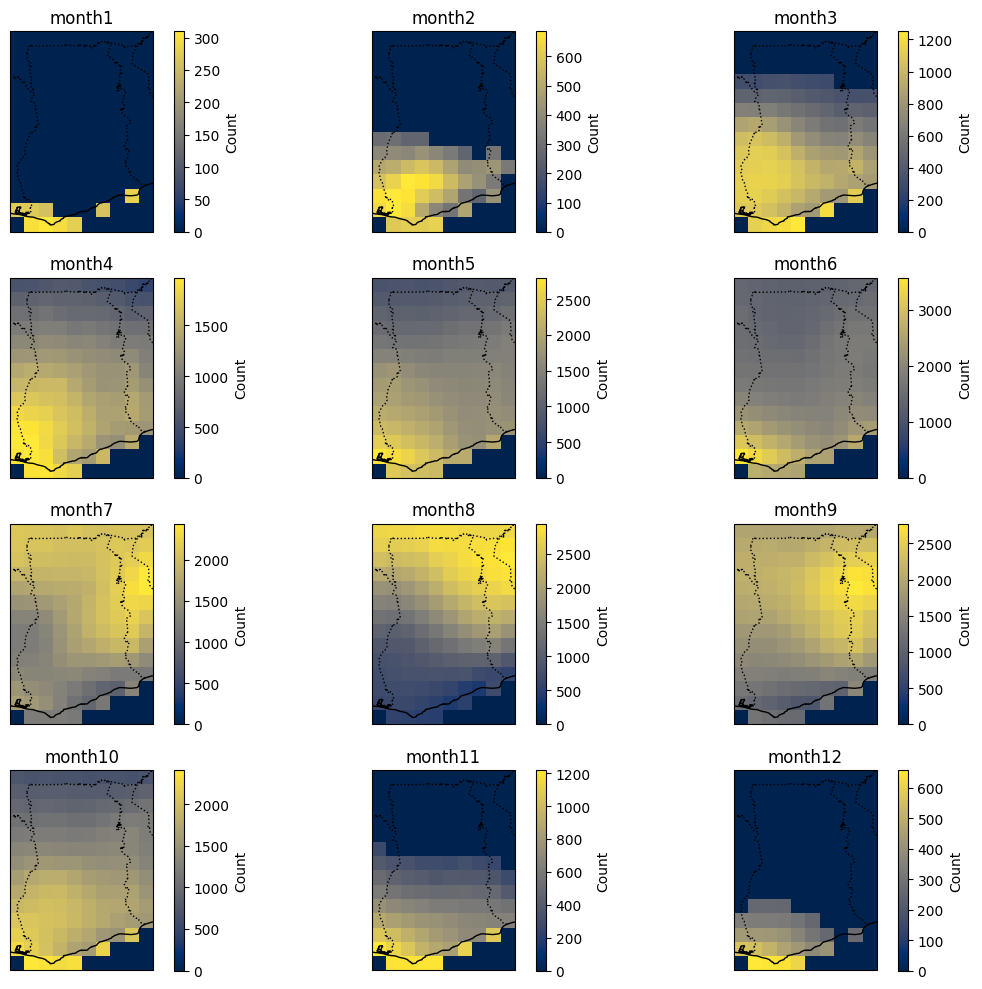

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 10),subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()

for i in range(12):
    month_data = data.isel(month=i)
    month_data.plot(ax=axes[i],transform=ccrs.PlateCarree(),  cmap='cividis',cbar_kwargs={'label': 'Count'})
    
    axes[i].set_title(f'month{i +1 }')
    axes[i].set_xlabel('Longitude')
    axes[i].set_ylabel('Latitude')

    
    
    axes[i].coastlines()
    axes[i].add_feature(cfeature.BORDERS, linestyle=':')
    axes[i].add_feature(cfeature.LAND, edgecolor='black',alpha=0.3)
    axes[i].add_feature(cfeature.OCEAN, alpha=0.1)

plt.tight_layout()
plt.show()i